Датасет представляет собой таблицу с данными о фильмах. Цель задачи в предсказании дохода фильма по его бюджету и оценке.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

data = pd.read_csv('imdb_movies.csv')


##Описание данных

In [61]:
data

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US


*   *names* - название фильма
*   *date_x* - дата выхода фильма
*   *score* - зрительская оценка
*   *genre* - жанр фильма
*   *overview* - описание фильма
*   *crew* - актёрский состав
*   *status* - выпущен фильм в прокат или нет
*   *budget_x* - бюджет фильма (в $)

*   *revenue* - доход (в $)
*   *country* - страна, в которой проводились съёмки





In [62]:
data['profit'] = data['revenue'] - data['budget_x']
data

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,profit
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,1.966167e+08
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,1.856795e+09
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,6.244590e+08
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2.190000e+07
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,2.639420e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US,2.353729e+06
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US,-2.447457e+06
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US,1.197992e+06
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US,3.596613e+08


In [63]:
print(data.dtypes)

names          object
date_x         object
score         float64
genre          object
overview       object
crew           object
orig_title     object
status         object
orig_lang      object
budget_x      float64
revenue       float64
country        object
profit        float64
dtype: object


In [64]:
data.describe()

,score,budget_x,revenue,profit
count,10178.000000,1.017800e+04,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08,1.882577e+08
std,13.537012,5.707565e+07,2.777880e+08,2.430160e+08
min,0.000000,1.000000e+00,0.000000e+00,-3.400000e+08
25%,59.000000,1.500000e+07,2.858898e+07,5.901626e+06
50%,65.000000,5.000000e+07,1.529349e+08,8.451547e+07
75%,71.000000,1.050000e+08,4.178021e+08,3.176665e+08
max,100.000000,4.600000e+08,2.923706e+09,2.686706e+09


##Основные характеристики

In [65]:
import scipy.stats as ss

stats = {
    'Среднее': data['profit'].mean(),
    'Медиана': data['profit'].median(),
    'Мода': ss.mode(data['profit'])[0],
    'Размах': data['profit'].max() - data['profit'].min(),
    'Дисперсия': np.var(data['profit']),
    'Стандартное отклонение': np.std(data['profit'])
}
stats

{'Среднее': 188257714.52788368,
 'Медиана': 84515466.4,
 'Мода': 7729998.800000012,
 'Размах': 3026706026.0,
 'Дисперсия': 5.905098275528179e+16,
 'Стандартное отклонение': 243004079.7091312}

###Матрица корреляции

In [66]:
corr_mat = data.corr(numeric_only=True)
corr_mat

,score,budget_x,revenue,profit
score,1.000000,-0.235470,0.096533,0.165649
budget_x,-0.235470,1.000000,0.673830,0.535381
revenue,0.096533,0.673830,1.000000,0.984827
profit,0.165649,0.535381,0.984827,1.000000


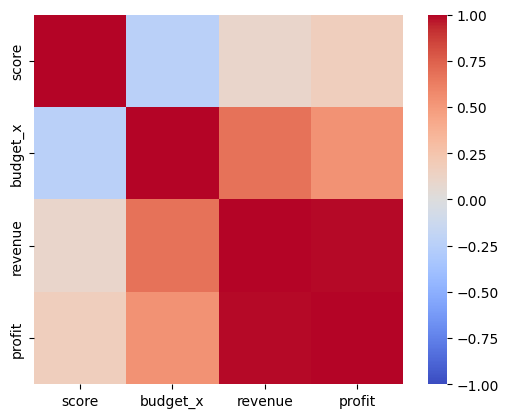

In [67]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

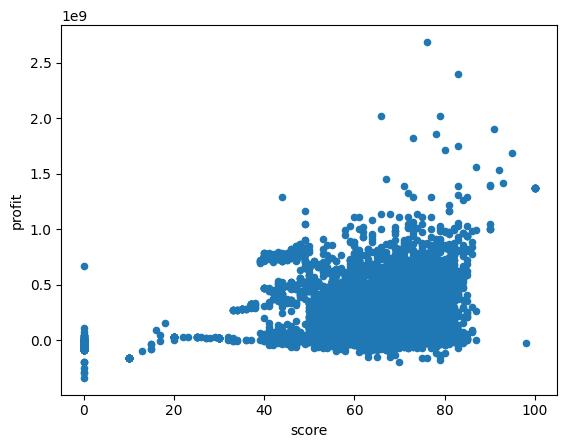

In [68]:
data.plot(kind='scatter', x='score', y='profit')
pass

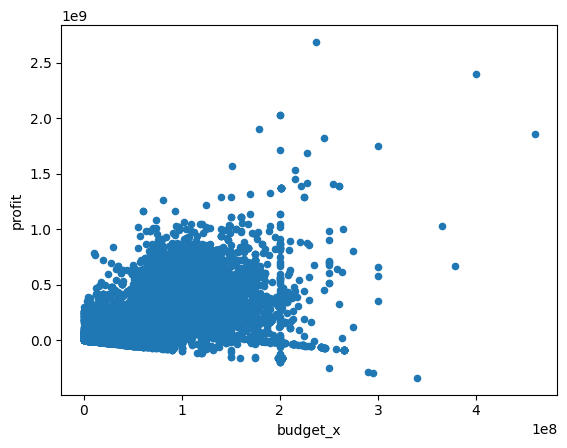

In [69]:
data.plot(kind='scatter', x='budget_x', y='profit')
pass

##Обработка выбросов

In [70]:
data['score'].quantile([0.005, .01, .1, .5, .9, .99, .995])

0.005     0.0
0.010     0.0
0.100    52.0
0.500    65.0
0.900    76.0
0.990    83.0
0.995    85.0
Name: score, dtype: float64

In [71]:
data['revenue'].quantile([0.005, .05, .1, .5, .9, .99, .995])

0.005    0.000000e+00
0.050    1.051907e+06
0.100    4.103473e+06
0.500    1.529349e+08
0.900    6.425959e+08
0.990    1.066400e+09
0.995    1.221411e+09
Name: revenue, dtype: float64

In [72]:
data['budget_x'].quantile([0.005, .05, .1, .5, .9, .99, .995])

0.005    4.462235e+04
0.050    2.000000e+06
0.100    4.310653e+06
0.500    5.000000e+07
0.900    1.454000e+08
0.990    2.159220e+08
0.995    2.460000e+08
Name: budget_x, dtype: float64

In [73]:
data['profit'].quantile([0.005, .05, .1, .5, .9, .99, .995])

0.005   -9.001226e+07
0.050   -2.534707e+07
0.100   -1.050462e+07
0.500    8.451547e+07
0.900    5.262784e+08
0.990    9.259946e+08
0.995    1.047243e+09
Name: profit, dtype: float64

In [74]:
rows_to_drop = data[
    (data['revenue'] < data['revenue'].quantile(0.005)) | (data['revenue'] > data['revenue'].quantile(0.995)) |
    (data['score']  < data['score'].quantile(0.005)) | (data['score']  > data['score'].quantile(0.995)) |
    (data['profit']  < data['profit'].quantile(0.005)) | (data['profit']  > data['profit'].quantile(0.995)) |
    (data['budget_x']  < data['budget_x'].quantile(0.005)) | (data['budget_x']  > data['budget_x'].quantile(0.995))].index
data_raw = data.drop(rows_to_drop)
data_raw.shape

(9971, 13)

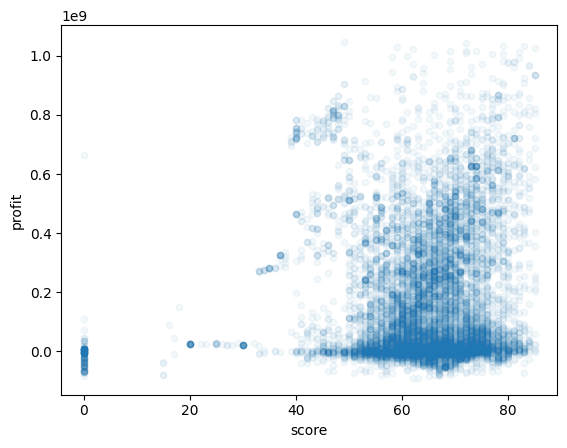

In [77]:
data_raw.plot(kind = 'scatter', x = 'score', y = 'profit', alpha=.05)
pass

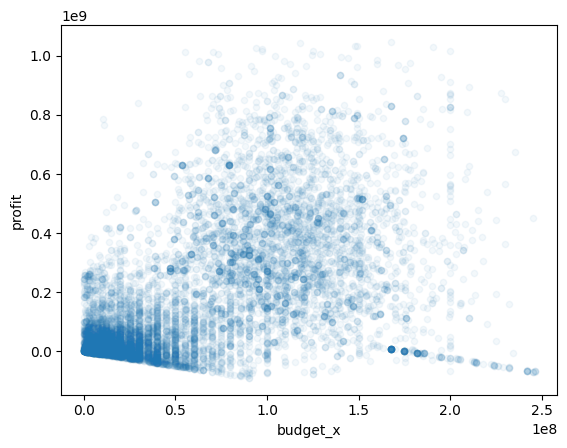

In [78]:
data_raw.plot(kind = 'scatter', x = 'budget_x', y = 'profit', alpha=.05)
pass

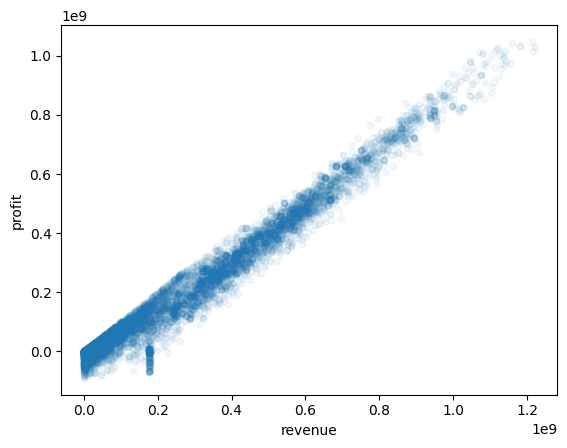

In [79]:
data_raw.plot(kind = 'scatter', x = 'revenue', y = 'profit', alpha=.05)
pass

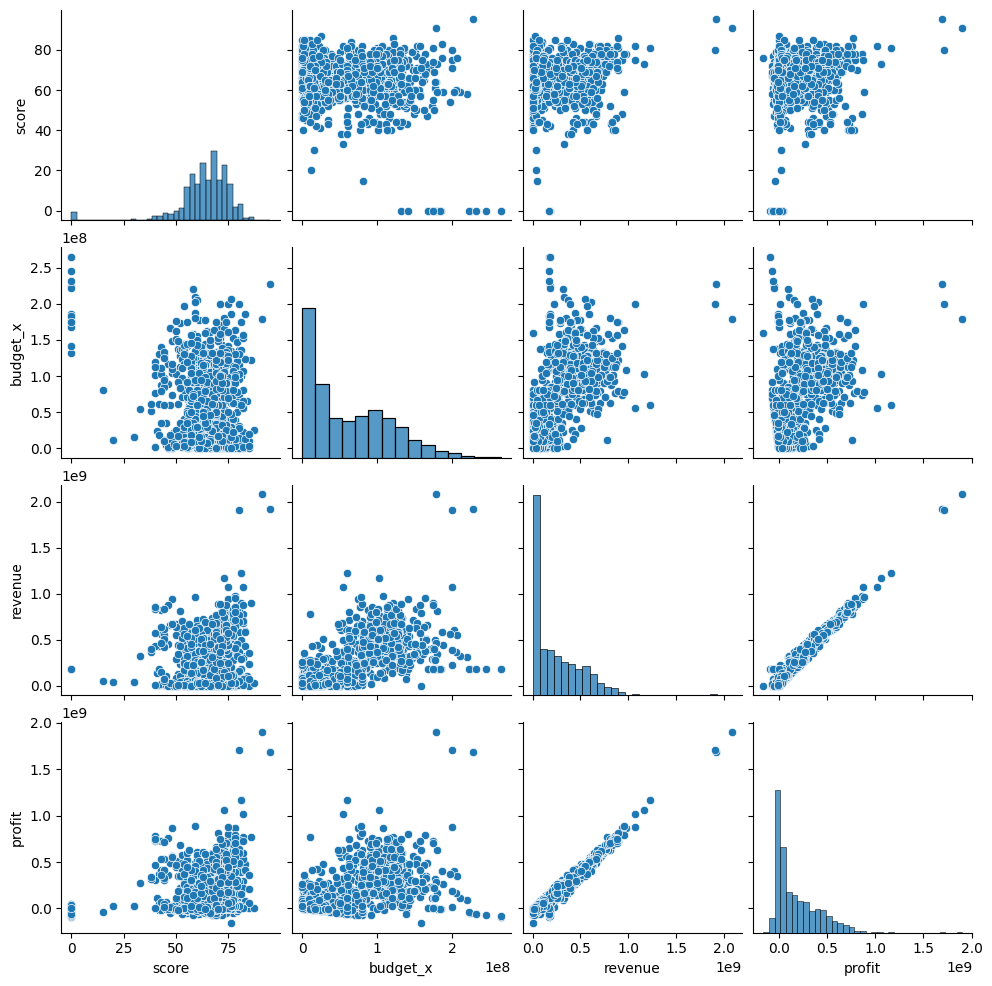

In [80]:
sns.pairplot(data.sample(1000), diag_kind='hist')
pass

##Обработка пропущенных значений

In [81]:
data_raw.isnull().sum()

names          0
date_x         0
score          0
genre         75
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
profit         0
dtype: int64

In [82]:
data_raw['genre'].fillna("Unknown", inplace=True)

C:\Users\serez\AppData\Local\Temp\ipykernel_47772\2976362582.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_raw['genre'].fillna("Unknown", inplace=True)


In [83]:
data_raw['crew'].fillna("Unknown", inplace=True)

C:\Users\serez\AppData\Local\Temp\ipykernel_47772\791027410.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_raw['crew'].fillna("Unknown", inplace=True)


In [84]:
data_raw.isnull().sum()

names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
profit        0
dtype: int64

##Отбор признаков

In [103]:
data_raw.columns

Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country', 'profit'],
      dtype='object')

In [123]:
X = data_raw.drop(['profit', 'revenue', 'names', 'date_x', 'genre', 'overview', 'crew', 'orig_title', 'status', 'orig_lang', 'country'], axis=1)
y = data_raw['profit']

###Разбиваем на обучающую и тестовую выборки

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(7478, 2493)

##Линейная регрессия

In [125]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [126]:
y_train_predict = lr_model.predict(X_train)
y_test_predict  = lr_model.predict(X_test)

In [127]:
lr_model.coef_

array([4.41320580e+06, 2.49576458e+00])

In [128]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(3.1483635395529004e+16,
 3.1834867268973144e+16,
 0.36301841164797943,
 0.3876862541223952)

In [129]:
lr_model.score(X_train, y_train)

0.36301841164797943

In [130]:
lr_model.score(X_test, y_test)

0.3876862541223952

In [131]:
MSE_train = np.mean((y_train_predict - y_train)**2)
MSE_test  = np.mean((y_test_predict - y_test)**2)
MSE_train, MSE_test

(3.1483635395529004e+16, 3.1834867268973144e+16)

In [132]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(177436285.45348045, 178423281.18542475)

RMSE на обучающей выборке $177 436 285

RMSE на тестовой выборке $178 423 281

##Случайный лес

In [133]:
from sklearn import ensemble
rf_model = ensemble.RandomForestRegressor(n_estimators = 1000)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [134]:
y_train_predict = rf_model.predict(X_train)
y_test_predict = rf_model.predict(X_test)

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)

In [135]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(73262074.89840853, 149664001.0240676)

RMSE на обучающей выборке $73 213 355

RMSE на тестовой выборке $149 708 786

In [136]:
importances = rf_model.feature_importances_
importances

array([0.26649779, 0.73350221])

In [137]:
np.sum(importances)

1.0

In [138]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
importances

budget_x    0.733502
score       0.266498
dtype: float64

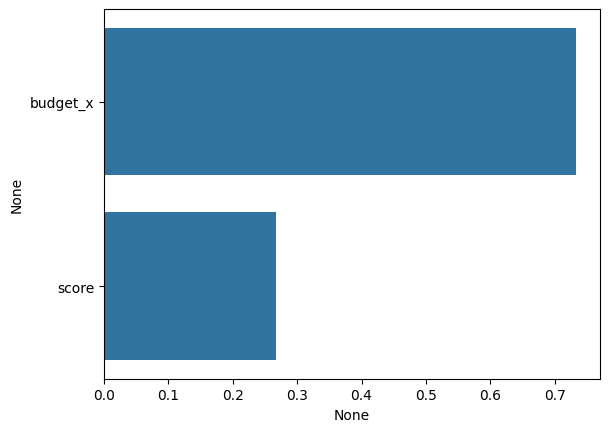

In [139]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

In [140]:
n_estimators_values = [10, 50, 100, 200, 500, 1000, 2000]
rmse_train_values = []
rmse_test_values = []

In [141]:
from sklearn import ensemble
for n_estimators in n_estimators_values:
    rf_model = ensemble.RandomForestRegressor(n_estimators=n_estimators)
    rf_model.fit(X_train, y_train)

    y_train_predict = rf_model.predict(X_train)
    y_test_predict = rf_model.predict(X_test)

    MSE_train = mean_squared_error(y_train, y_train_predict)
    MSE_test  = mean_squared_error(y_test,  y_test_predict)

    rmse_train = np.sqrt(MSE_train)
    rmse_test = np.sqrt(MSE_test)

    rmse_train_values.append(rmse_train)
    rmse_test_values.append(rmse_test)

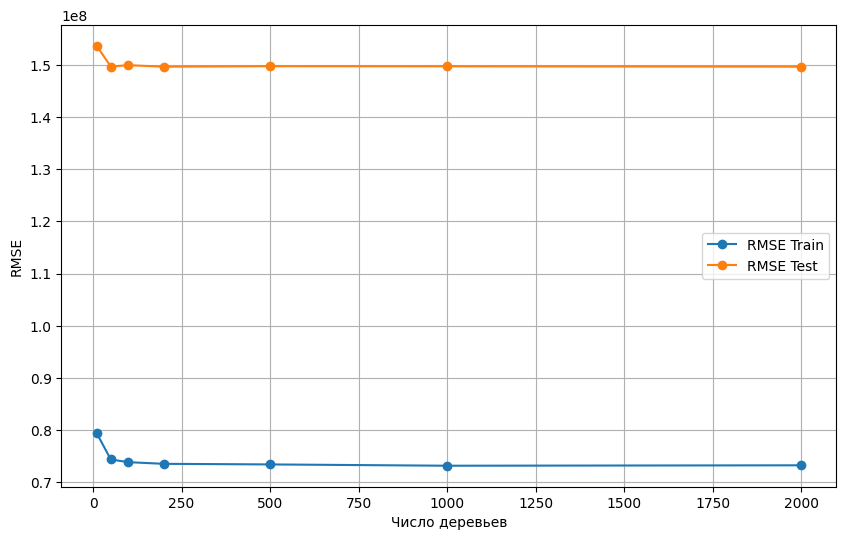

In [142]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, rmse_train_values, marker='o', label='RMSE Train')
plt.plot(n_estimators_values, rmse_test_values, marker='o', label='RMSE Test')
plt.xlabel("Число деревьев")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()

### Выводы
Лучше показал себя метод Random Forest при числе деревьев больше 200.

Для более лучших результатов можно использовать другие методы.